Задание
Цель: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.
Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.
Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
b) Исследуйте признаки на выбросы несколькими способами.
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.
а) Кратко опишите, какие преобразования были сделаны с данными.
b) Сравните точность двух моделей.
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.
Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.
Результат:
Получены практические знания по работе с выбросами в данных.

In [487]:
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import numpy as np
import pandas as pd # Для работы с данными 
import seaborn as sns
%matplotlib inline

In [488]:
df = pd.read_csv('Data/glass.csv')

In [489]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [491]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [492]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Всего представлено 6 классов, т.к. датасет небольшой и четвертый класс отсутствует, модели будет не просто построить классификацию.

In [493]:
X = df.drop(columns='Type')
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [494]:
y = df['Type']

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [496]:
model = RandomForestClassifier(random_state=34)

In [497]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=34)

In [498]:
Rnd_forest_score = model.score(X_test, y_test)
Rnd_forest_score

0.9069767441860465

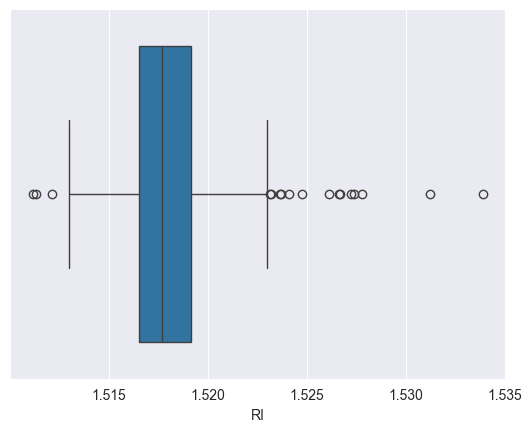

In [499]:
sns.boxplot(x=df["RI"]);


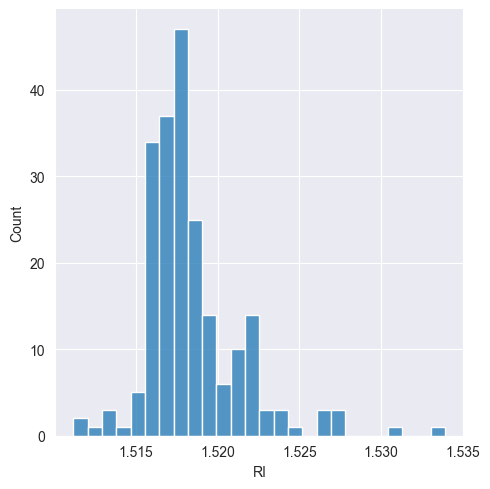

In [500]:
sns.displot(data=df, x="RI");

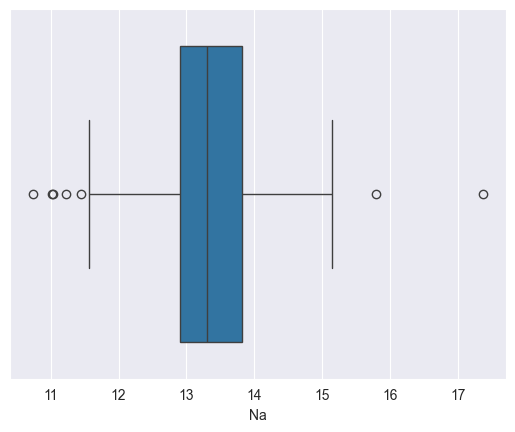

In [501]:
sns.boxplot(x=df["Na"]);

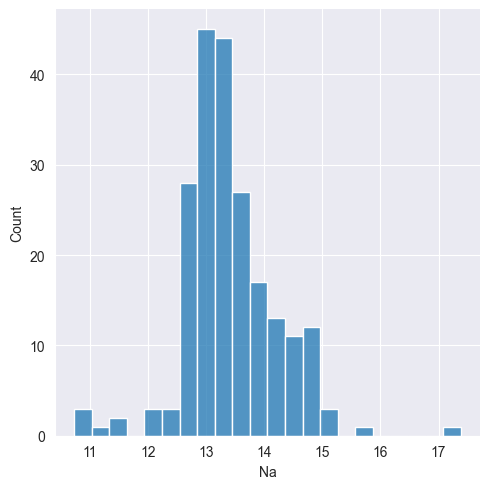

In [502]:
sns.displot(data=df, x="Na");

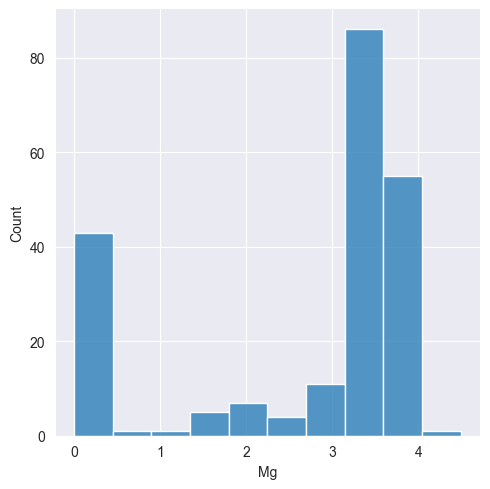

In [503]:
sns.displot(data=df, x="Mg");

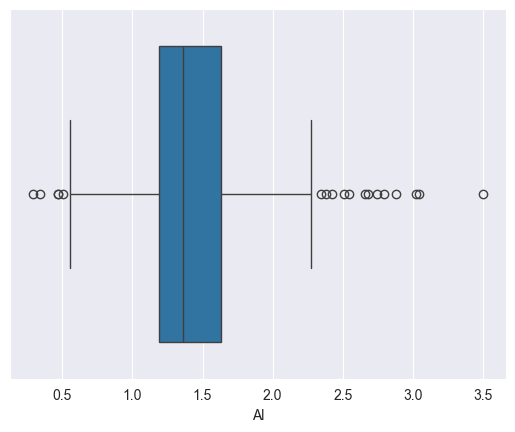

In [504]:
sns.boxplot(x=df["Al"]);

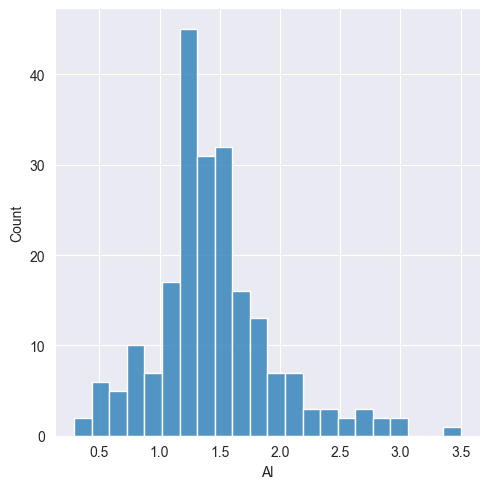

In [505]:
sns.displot(data=df, x="Al");

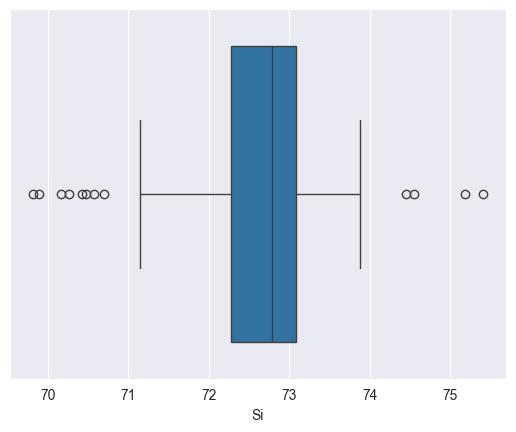

In [506]:
sns.boxplot(x=df["Si"]);

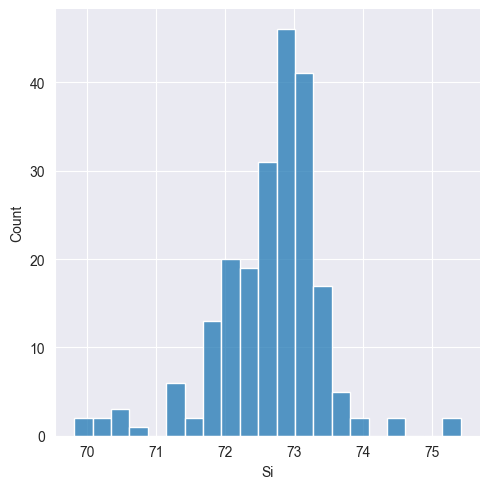

In [507]:
sns.displot(data=df, x="Si");

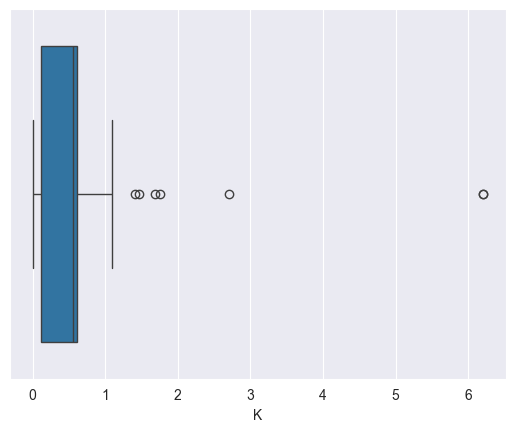

In [508]:
sns.boxplot(x=df["K"]);

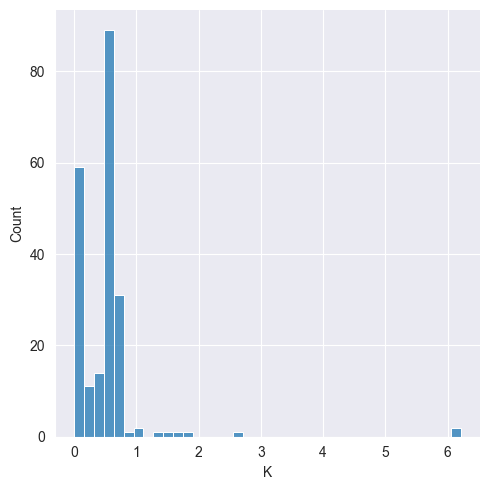

In [509]:
sns.displot(data=df, x="K");

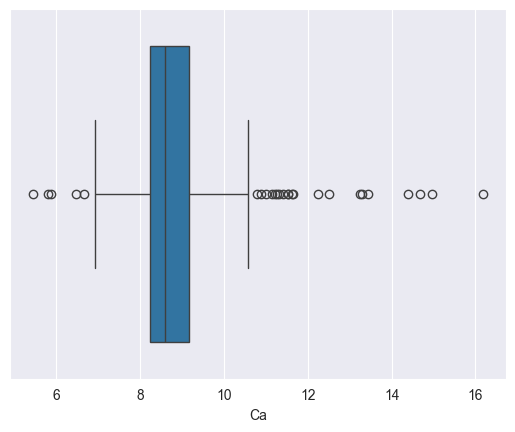

In [510]:
sns.boxplot(x=df["Ca"]);

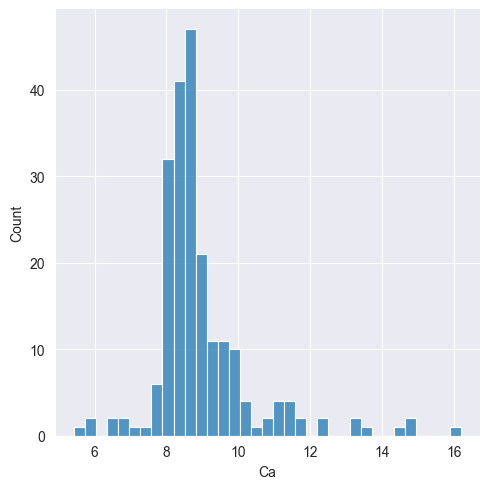

In [511]:
sns.displot(data=df, x="Ca");

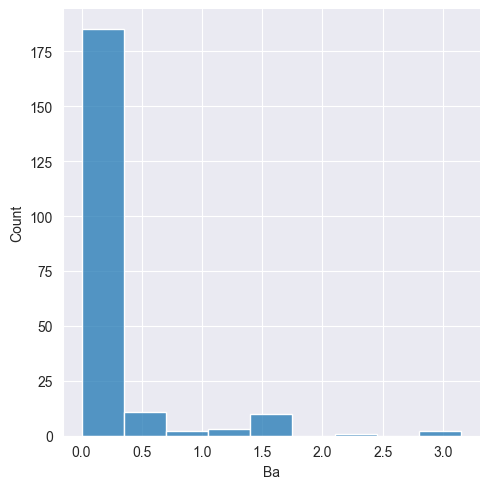

In [512]:
sns.displot(data=df, x="Ba");

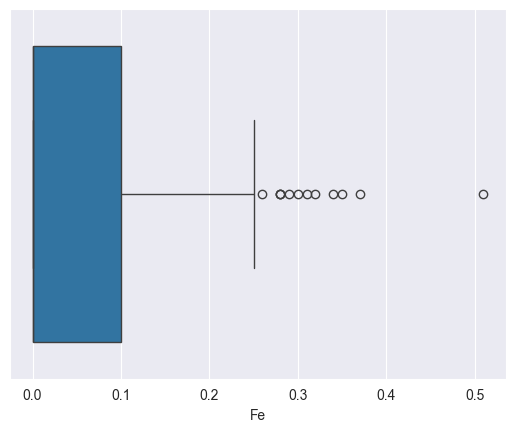

In [513]:
sns.boxplot(x=df["Fe"]);

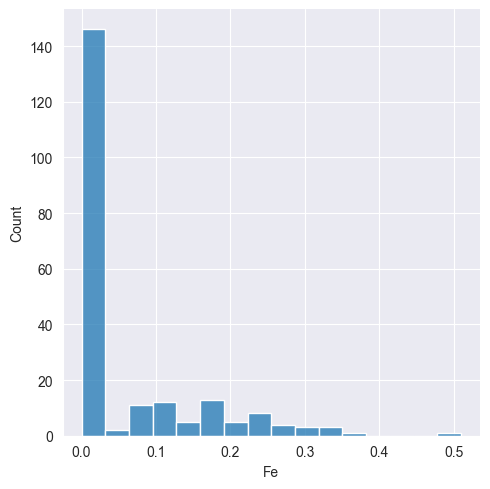

In [514]:
sns.displot(data=df, x="Fe");

Признаков с нормальным распределением нет, но стремящиеся к нормальному есть.

In [515]:
OCSVM = OneClassSVM(nu=0.1)

In [516]:
OCSVM.fit(X_train, y_train)

OneClassSVM(nu=0.1)

In [517]:
pred_OCSVM = OCSVM.predict(X_test)
print(pred_OCSVM)

[ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1]


In [518]:
ELL = EllipticEnvelope(contamination=0.1)

In [519]:
ELL.fit(X_train, y_train)

EllipticEnvelope()

In [520]:
pred_ELL = ELL.predict(X_test)
print(pred_ELL)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1]


In [521]:
a = (pred_OCSVM == pred_ELL)
print(a)

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True False  True  True False  True False False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True  True]


In [522]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [523]:
#find Q1, Q3, and interquartile range for each column
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3+1.5 * IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(136, 10)

In [524]:
print('Процент выбросов равен =',round((1 - len(data_clean)/len(df))*100, 2), '%')

Процент выбросов равен = 36.45 %


Что-то много данных удалилось, более 10%, что не очень хорошо, но проверим модель без выбросов

In [525]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_clean.drop(columns='Type'), data_clean['Type'], test_size=0.2, random_state=42)

In [526]:
model.fit(X_train1, y_train1)

RandomForestClassifier(random_state=34)

In [527]:
model.score(X_test1, y_test1)

0.75

После удаления выбросов, модель стала хуже, т.к. слишком много данных было удалено и скорее всего модель недообучилась. 

In [528]:
#Z-оценка показывает, сколько стандартных отклонений данного значения от среднего
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean1 = df[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean1.shape

(194, 10)

In [529]:
print('Процент выбросов равен =',round((1 - len(data_clean1)/len(df))*100, 2), '%')

Процент выбросов равен = 9.35 %


Обучим заново модель и сравним результаты

In [530]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_clean1.drop(columns='Type'), data_clean1['Type'], test_size=0.2, random_state=42)

In [531]:
model.fit(X_train2, y_train2)

RandomForestClassifier(random_state=34)

In [532]:
model.score(X_test2, y_test2)

0.7948717948717948

Как бы это не было странно, но модель RandomForestClassifier с выбросами обучилась намного лучше, чем без них, возможно это произошло из-за малого количество данных и произошло недообучение модели